# Problem-1 
Build a Neural Network with Hyper-parameter fine tuning model

In [7]:
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import matplotlib as mt
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
train_data = train_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/dataset/train',  
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


test_data = test_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/dataset/test',  
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 840 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=150, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
result=model.fit(train_data,
                 steps_per_epoch=48//batch_size,epochs=30,
                 validation_data=test_data,
                 validation_steps=48//batch_size)

Epoch 1/30
3/3 [==============================] - 6s 2s/step - loss: 0.8630 - accuracy: 0.5833 - val_loss: 0.7075 - val_accuracy: 0.4167
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 0.6791 - accuracy: 0.6042 - val_loss: 0.7755 - val_accuracy: 0.3958
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 0.7506 - accuracy: 0.4500 - val_loss: 0.7029 - val_accuracy: 0.4792
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 0.6986 - accuracy: 0.4792 - val_loss: 0.6938 - val_accuracy: 0.4583
Epoch 5/30
3/3 [==============================] - 4s 2s/step - loss: 0.6944 - accuracy: 0.4583 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 3s 1s/step - loss: 0.6921 - accuracy: 0.6458 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 3s 1s/step - loss: 0.6945 - accuracy: 0.4583 - val_loss: 0.6911 - val_accuracy: 0.6458
Epoch 8/30
3/3 [=========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


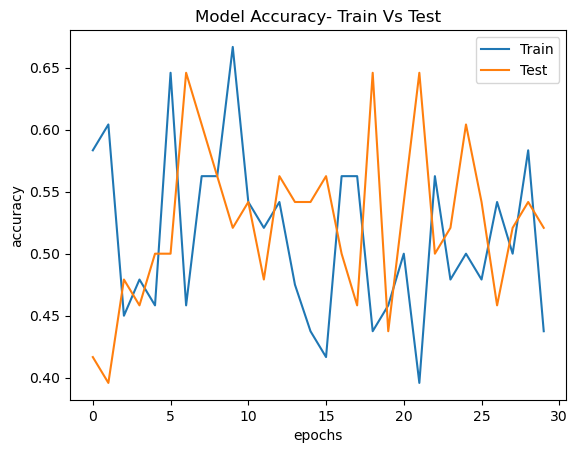

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

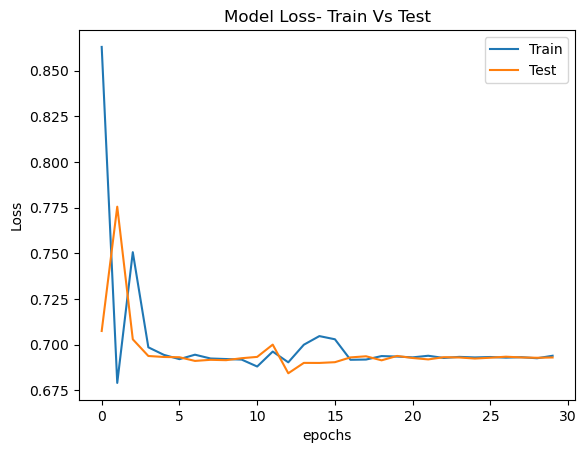

In [14]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# Problem-2
Build an image classifier model with Pytorch

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [33]:
batch_size=128
num_classes=10
epochs=12

In [34]:
img_rows,img_cols=32,32

In [35]:
from keras.datasets import cifar100
(xtrain,ytrain),(xtest,ytest)=cifar100.load_data()

In [36]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Testing set images shape: {}'.format(xtest.shape))

print('Training set labels shape: {}'.format(ytrain.shape))
print('Testing set labels shape: {}'.format(ytest.shape))

Training set images shape: (50000, 32, 32, 3)
Testing set images shape: (10000, 32, 32, 3)
Training set labels shape: (50000, 1)
Testing set labels shape: (10000, 1)


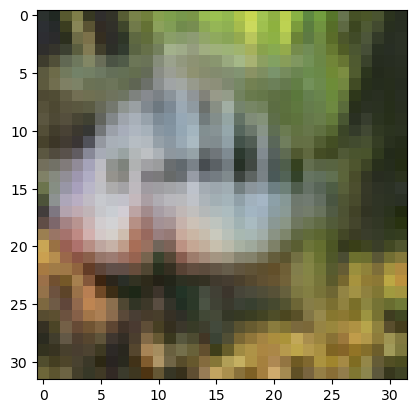

In [37]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[4])

In [38]:
xtrain[0].shape

(32, 32, 3)

In [39]:
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,3)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,3)

print(xtrain.shape)
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [40]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [41]:
xtrain/=255
xtest/=255
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [42]:
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)

In [46]:
model=Sequential()

model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=3,activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               627300    
                                                      

In [48]:

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [49]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,
                epochs=3,verbose=1,
                validation_data=(xtest,ytest))

Epoch 1/3
391/391 [==============================] - 138s 352ms/step - loss: 3.6843 - accuracy: 0.1598 - val_loss: 3.1938 - val_accuracy: 0.2497
Epoch 2/3
391/391 [==============================] - 144s 367ms/step - loss: 2.9145 - accuracy: 0.3031 - val_loss: 2.8828 - val_accuracy: 0.3100
Epoch 3/3
391/391 [==============================] - 145s 371ms/step - loss: 2.4957 - accuracy: 0.3866 - val_loss: 2.7792 - val_accuracy: 0.3365


In [50]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test accuracy',score[1])

Test Loss: 2.7791576385498047

Test accuracy 0.33649998903274536


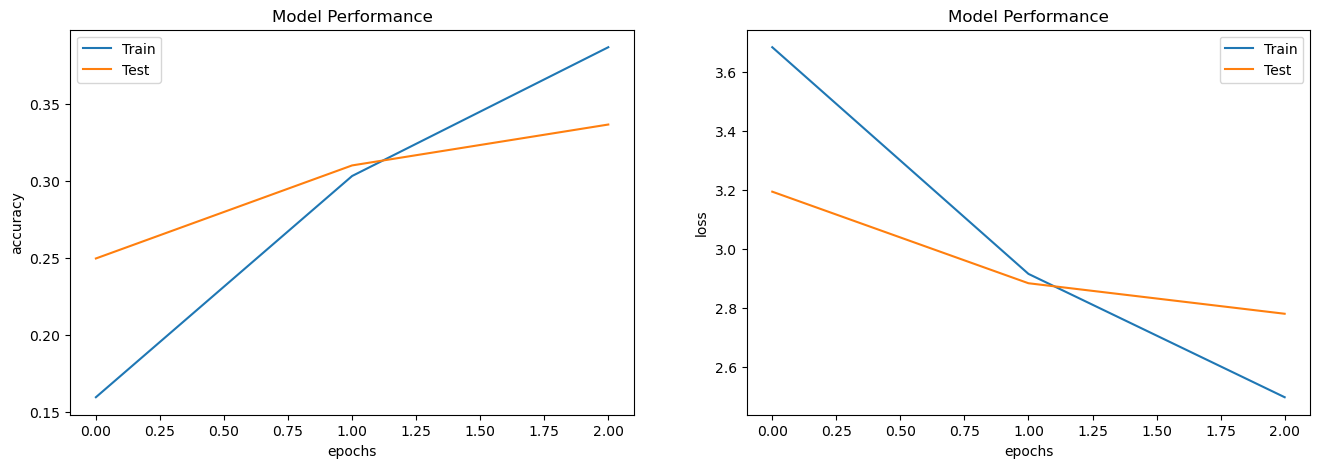

In [51]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))

ax1.plot(result.history['accuracy'])
ax1.plot(result.history['val_accuracy'])

ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epochs')
ax1.legend(['Train','Test'])


ax2.plot(result.history['loss'])
ax2.plot(result.history['val_loss'])

ax2.set_title('Model Performance')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax2.legend(['Train','Test'])